In [11]:
using CSV, DataFrames, Gadfly, GLM, Distributions

In [56]:
data = CSV.read("tuition_vs_salary.csv")

,University,Tuition,Salary
1,Harvey Mudd College,50649,157400
2,Massachusetts Institute of Technology,46704,150400
3,Stanford University,46320,143100
4,California Institute of Technology,45390,143100
5,Harvard University,45278,142600
6,Princeton University,43450,141300
7,Yale University,47600,135400
8,University of California-Berkeley,13431,132300
9,Pennsylvania State University-Main Campus,17514,103100
10,Ohio State University-Main Campus,10037,95100


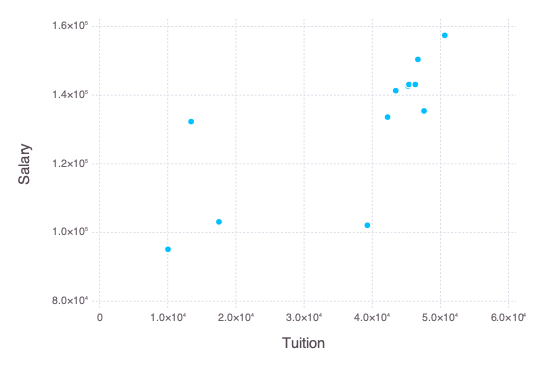

In [57]:
# Traçage des variables explicatives
fig1 = plot(data, x=:Tuition, y=:Salary, Geom.point)

In [58]:
X₁ = collect(skipmissing(data[:Tuition]))
Y = collect(skipmissing(data[:Salary]))
n = length(Y)
X = hcat(ones(n),X₁)

12×2 Array{Float64,2}:
 1.0  50649.0
 1.0  46704.0
 1.0  46320.0
 1.0  45390.0
 1.0  45278.0
 1.0  43450.0
 1.0  47600.0
 1.0  13431.0
 1.0  17514.0
 1.0  10037.0
 1.0  42253.0
 1.0  39290.0

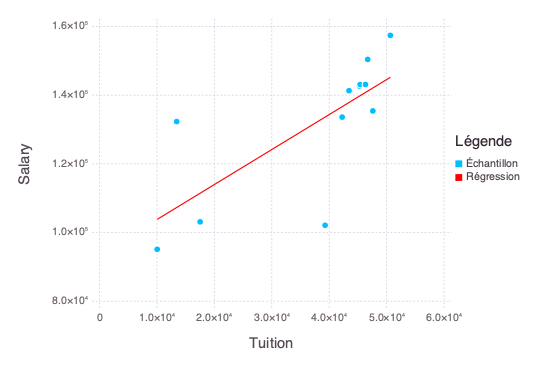

In [59]:
β̂ = (X'*X)\X'*Y

sample = layer( x=X[:,2], y=Y, Geom.point, Theme(default_color="deepskyblue"))
xx = [ones(10) collect(linspace(minimum(X₁),maximum(X₁),10))]
regression = layer(x=xx[:,2], y = xx*β̂, Geom.line, Theme(default_color="red"))

plot(sample,regression ,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]),
    Guide.xlabel("Tuition"), Guide.ylabel("Salary"))


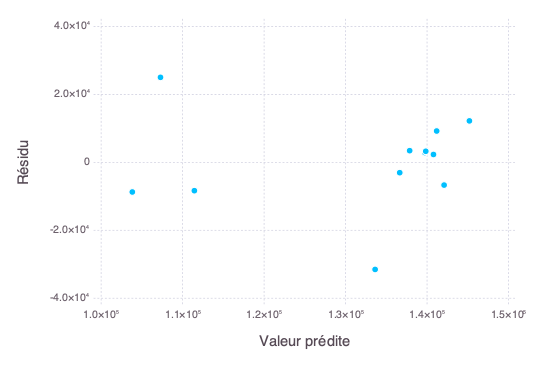

In [60]:
# Validation des hypothèses 1 et 2
Ŷ = X*β̂
e = Y - Ŷ
plot(x=Ŷ, y=e, Geom.point, Guide.xlabel("Valeur prédite"), Guide.ylabel("Résidu"))

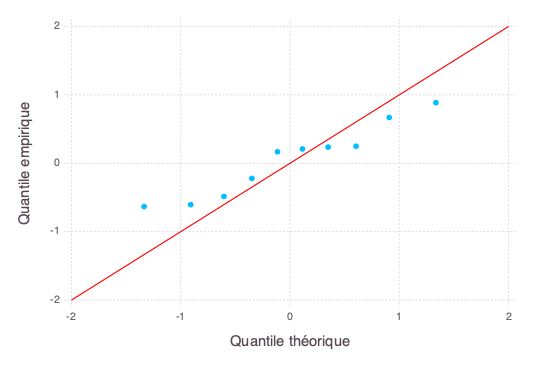

In [53]:
# Validation de l'hypothèse 4
empirical = layer(x=Normal(), y=e/std(e), Stat.qq, Geom.point, Theme(default_color="deepskyblue"))
theoretical = layer(x=[-2 2], y=[-2 2], Geom.line, Theme(default_color="red"))
plot(empirical,theoretical,Guide.xlabel("Quantile théorique"), Guide.ylabel("Quantile empirique"))

In [62]:
SST = sum( (Y-mean(Y)).^2)
SSE = sum( e.^2 )
SSR = SST - SSE

F₀ = (SSR/1) / (SSE/(n-1-1)) 

# On rejette H₀ au seuil de 5% si la valeur-p associé à F₀ est plus petite que 5%
valeurp = ccdf(FDist(1,55),F₀)
if valeurp<0.05
    println("Comme la valeur-p = $valeurp<0.05, on rejette H_0. La régression est donc significative.")
else
    println("Comme la valeur-p = $valeurp>0.05, on ne rejette pas H_0. La régression n'est donc pas significative.")
end

# Calcul du coefficient de détermination
R² = SSR/SST
println("Le coefficient de détermination est $R²")

Comme la valeur-p = 0.0011896743151873564<0.05, on rejette H_0. La régression est donc significative.
Le coefficient de détermination est 0.5389836327264628
